In [1]:
import pandas as pd
import glob
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt 
import cv2
import numpy as np

##### Получаем пути до файлов разметки

In [2]:
paths = glob.glob("path to annotation txt files")

##### Записываем в DataFrame информацию из файлов аннотации 

In [3]:
df = pd.DataFrame(columns=['file_name', 'label', 'x1', 'y1', 'x2', 'y2']) 

In [17]:
for path in paths:
    f = open(path)
    l = [line.strip().split() for line in f][0]
    df = df.append({'file_name': l[0], 'label': l[1], 'x1': int(l[2]), 'y1': int(l[3]),
                   'x2': int(l[4]), 'y2': int(l[5])}, ignore_index=True)

In [5]:
df.head(5)

,file_name,label,x1,y1,x2,y2
0,010466.jpg,Straight_Knife,853,481,929,684
1,010467.jpg,Straight_Knife,869,464,947,524
2,010468.jpg,Straight_Knife,495,518,582,572
3,010470.jpg,Straight_Knife,741,524,794,603
4,010471.jpg,Straight_Knife,587,299,879,366


##### Сохряняем DataFrame в файл формата csv

In [6]:
df.to_csv('..\\output\\valid_data.csv')

In [7]:
df.label.unique()

array(['Straight_Knife', 'Scissor', 'Multi-tool_Knife', 'Utility_Knife',
       'Folding_Knife'], dtype=object)

##### Открываем изображение из датасета и наносим bounding box согласно разметке

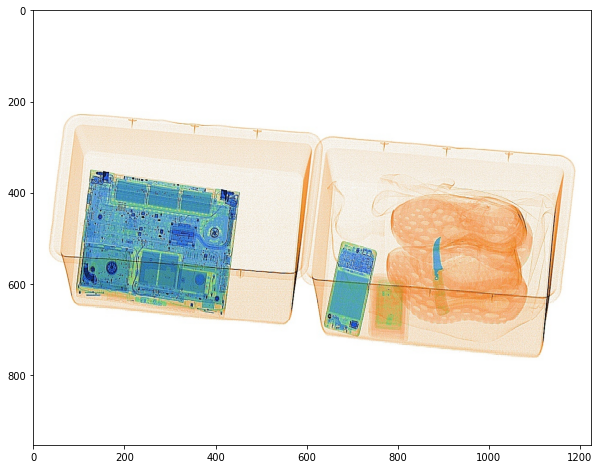

In [8]:
img = Image.open("path to image folder\\010466.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

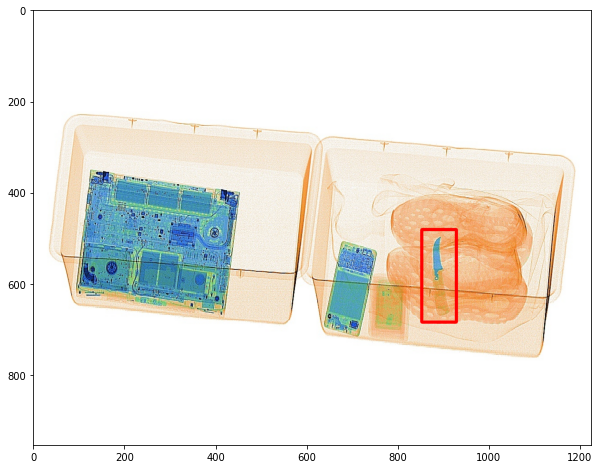

In [9]:
row = df.iloc[0]
img = Image.open(f"path to image folder\\{row.file_name}").convert('RGB')

img = np.array(img)
output = img.copy()
cv2.rectangle(output, (row['x1'], row['y1']), (row['x2'], row['y2']), (255, 0, 0), 5)
plt.figure(figsize=(10, 10))
plt.imshow(output)
plt.show()

In [10]:
h, w, c = img.shape

In [12]:
file = pd.read_csv('..\\output\\valid_data.csv', index_col=0)

##### Рассчитываем координаты центра bounding box'a, его ширину и высоту

In [13]:
file['w_img'] = w
file['h_img'] = h

file['w_box'] = abs((file.x2 - file.x1) / file['w_img'])
file['h_box'] = abs((file.y2 - file.y1) / file['h_img'])

file['x_c'] = (file.x1 + file['w_box'] * file['w_img'] /2) / file['w_img']
file['y_c'] = (file.y1 + file['h_box'] * file['h_img'] /2) / file['h_img']

file['txt_name'] = file.file_name.apply(lambda x: x.split('.')[0] + '.txt')

file['x_c_img'] = file['x_c'] * file['w_img']
file['y_c_img'] = file['y_c'] * file['h_img']

file['w_box_img'] = file['w_box'] * file['w_img']
file['h_box_img'] = file['h_box'] * file['h_img']

In [14]:
file.to_csv('..\\output\\valid_yolo_data.csv')

In [15]:
file.head()

,file_name,label,x1,y1,x2,y2,w_img,h_img,w_box,h_box,x_c,y_c,txt_name,x_c_img,y_c_img,w_box_img,h_box_img
0,010466.jpg,Straight_Knife,853,481,929,684,1225,954,0.062041,0.212788,0.727347,0.610587,010466.txt,891.0,582.5,76.0,203.0
1,010467.jpg,Straight_Knife,869,464,947,524,1225,954,0.063673,0.062893,0.741224,0.517820,010467.txt,908.0,494.0,78.0,60.0
2,010468.jpg,Straight_Knife,495,518,582,572,1225,954,0.071020,0.056604,0.439592,0.571279,010468.txt,538.5,545.0,87.0,54.0
3,010470.jpg,Straight_Knife,741,524,794,603,1225,954,0.043265,0.082809,0.626531,0.590671,010470.txt,767.5,563.5,53.0,79.0
4,010471.jpg,Straight_Knife,587,299,879,366,1225,954,0.238367,0.070231,0.598367,0.348532,010471.txt,733.0,332.5,292.0,67.0


In [16]:
names = {'Straight_Knife': 0, 'Folding_Knife': 1, 'Scissor': 2, 'Utility_Knife': 3, 'Multi-tool_Knife': 4}

In [16]:
for i, row in file.iterrows():
    with open(f'.\\labels_valid\\{row.txt_name}', 'w') as f:
        f.write(f'{names[row.label]} {row.x_c} {row.y_c} {row.w_box} {row.h_box}')

In [17]:
img = Image.open("path to image folder\\010466.jpg")
with open(f'.\\labels_valid\\010466.txt') as f:
    data = [float(x) for x in f.read().split()]

In [18]:
img_w, img_h = img.size
img_w, img_h

(1225, 954)

In [19]:
x_c_img = data[1] * img_w
w_box_img = data[3] * img_w

y_c_img = data[2] * img_h
h_box_img = data[4] * img_h

x1_box = int(x_c_img - w_box_img/2)
y1_box = int(y_c_img - h_box_img/2)

x2_box = int(x_c_img + w_box_img/2)
y2_box = int(y_c_img + h_box_img/2)

##### Проверяем правильность рассчитанных координат

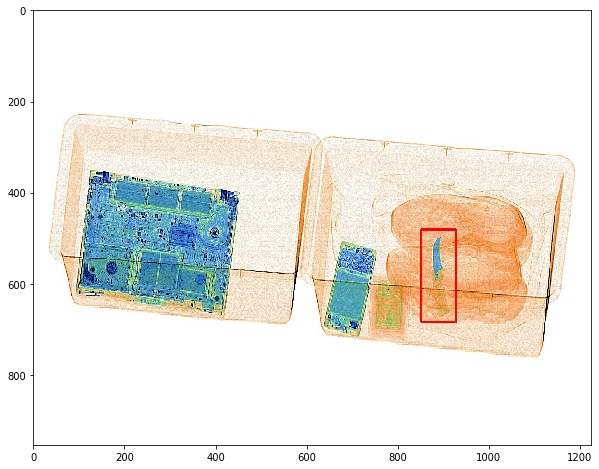

In [20]:
output = np.array(img).copy()
cv2.rectangle(output, (x1_box,y1_box), (x2_box, y2_box), (255, 0, 0), 3)
plt.figure(figsize=(10, 10))
plt.imshow(output)
plt.show()